Make new Product Recommendations
Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.
Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) - ratings_Electronics_Ver3.tar.xzView in a new window (you may use winrar application to extract the .csv file)


o The repository has several datasets. For this case study, please use the Electronics dataset.
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.
o The data set consists of:
● 7,824,482 Ratings (1-5) for Electronics products.
● Other metadata about products. Please see the description of the fields available on the web page cited above.

Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) - ratings_Electronics_Ver3.tar.xzView in a new window (you may use winrar application to extract the .csv file)

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


o The repository has several datasets. For this case study, please use the Electronics dataset.
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.
o The data set consists of:
● 7,824,482 Ratings (1-5) for Electronics products.
● Other metadata about products. Please see the description of the fields available on the web page cited above.


o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating
o Save these to a tab separated file. Name this file as product_ratings.csv.

Steps -
1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
8. Summarise your insights.

Mark Distributions -
Step - 1,2,3,8 - 5 marks each
Step - 4,5,6,7 - 10 marks each

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo.ipynb
For Ex - Recommendation Systems_R5_Project.ipynb

Github link: https://classroom.github.com/a/WSWMHTtWLinks to an external site.
Regards,
Program Office

In [2]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import warnings; warnings.simplefilter('ignore')
import simplejson as js
from sklearn.grid_search import GridSearchCV

# Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [4]:
#Loading data"
E_Ratings = pd.read_csv("ratings_Electronics.csv",names=['user_id','prod_id','rating','timestamp'])
E_Ratings.head(5)

,user_id,prod_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
E_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id      object
prod_id      object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
E_Ratings.shape

(7824482, 4)

In [7]:
if 'timestamp' in E_Ratings.columns :
    E_Ratings.drop(E_Ratings[['timestamp']],axis=1, inplace=True)

E_Ratings.columns

Index(['user_id', 'prod_id', 'rating'], dtype='object')

In [8]:
E_Ratings.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [9]:
# find unique users
E_Ratings.user_id.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A1T1YSCDW0PD25    227
                 ... 
A2D9026EWW9XTD      1
AS626O9RF27SG       1
A2K9G1B16JVV12      1
AXBXXY2FDRGC6       1
AADHGUX1LKBMB       1
A2B9L7JOKHYENL      1
A3CALDD0O20YJ3      1
A31VLQRF67ZNMB      1
A18Y07LTE9E7Q7      1
A17OQDWLLT0NBW      1
A1CU2ELHKBV4I4      1
A5R8I5G0RQZLG       1
A2L1AIIJM0OXAZ      1
A6D5W6H9FBB2O       1
A3S4ECK089

 # Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )  

In [10]:
counts = E_Ratings['user_id'].value_counts()
E_Ratings_df = E_Ratings[E_Ratings['user_id'].isin(counts[counts >= 50].index)]

In [11]:
E_Ratings_df.shape

(125871, 3)

In [12]:
# Check for duplicates
duplicate_bool = E_Ratings_df.duplicated(subset=['user_id','prod_id'], keep='first')
duplicate = E_Ratings_df.loc[duplicate_bool == True]
duplicate


,user_id,prod_id,rating


In [13]:
# Lets get the product details as well

In [14]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_Products = getDF('meta_Electronics.json.gz')

df_Products.head(5)

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [15]:
if 'imUrl' in df_Products.columns :
    df_Products.drop(df_Products[['imUrl','description','categories','price','salesRank','related','brand']],axis=1, inplace=True)

df_Products.columns

Index(['asin', 'title'], dtype='object')

In [16]:
df_Products.head(5)

,asin,title
0,0132793040,Kelby Training DVD: Mastering Blend Modes in A...
1,0321732944,Kelby Training DVD: Adobe Photoshop CS5 Crash ...
2,0439886341,Digital Organizer and Messenger
3,0511189877,CLIKR-5 Time Warner Cable Remote Control UR5U-...
4,0528881469,Rand McNally 528881469 7-inch Intelliroute TND...


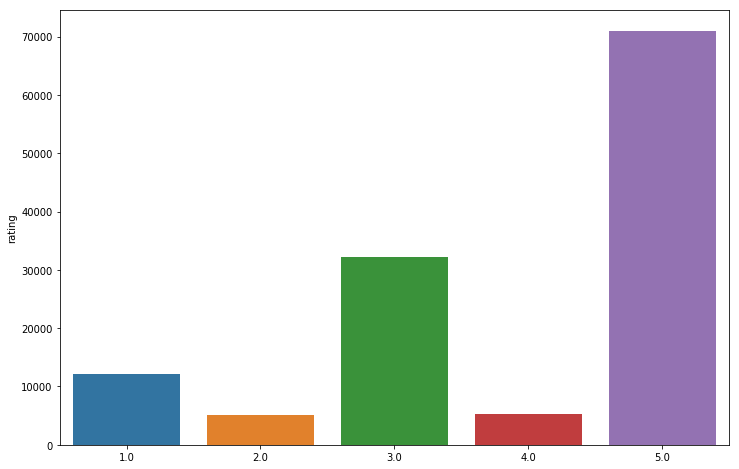

In [17]:
# Ratings split up
fig = plt.figure(figsize=(12,8))
sns.barplot(x = E_Ratings_df['rating'].unique(), y= E_Ratings_df['rating'].value_counts())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d331589b0>]],
      dtype=object)

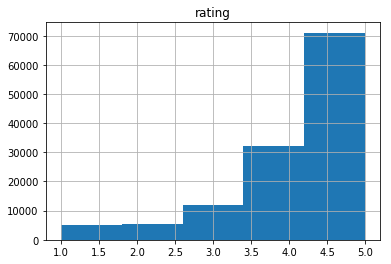

In [18]:
E_Ratings_df.hist('rating',bins = 5)

In [19]:
num_users = len(E_Ratings_df['user_id'].unique())
num_items = len(E_Ratings_df['prod_id'].unique())

print("Number of reviewers: " + str(num_users))
print("Number of products : " + str(num_items))
print("Number of ratings  :" + str(len(E_Ratings_df)))

Number of reviewers: 1540
Number of products : 48190
Number of ratings  :125871


In [20]:
# Most rated Electronic devices/Top rated products

ratings_count = pd.DataFrame(E_Ratings_df.groupby(['prod_id'])['rating'].sum())
top10 = ratings_count.sort_values('rating', ascending = False).head(10)
print("Following are top rated Electronics products")
top10.merge(df_Products, left_index = True, right_on = 'asin')

Following are top rated Electronics products


,rating,asin,title
182679,895.0,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...
347233,869.0,B0088CJT4U,TP-LINK TL-WDR4300 Wireless N750 Dual Band Rou...
71496,797.0,B000N99BBC,TP-LINK TL-SG1005D 10/100/1000Mbps 5-Port Giga...
336534,771.0,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
341565,661.0,B00829TIEK,Seagate Backup Plus 3TB USB 3.0 Desktop Extern...
341551,605.0,B00829THK0,Seagate Backup Plus 1TB Desktop External Hard ...
352520,561.0,B008DWCRQW,D-Link Wireless AC 1750 Mbps Home Cloud App-En...
224418,551.0,B004CLYEDC,"Micra Digital CAT5e Snagless Patch Cable, 5 Fe..."
156198,528.0,B002R5AM7C,"Flip MinoHD Video Camera - Brushed Metal, 8 GB..."
161013,498.0,B002V88HFE,eneloop SEC-CSPACER4PK C Size Spacers for use ...


# Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [21]:
train_data, test_data = train_test_split(E_Ratings_df, test_size = 0.30, random_state=0)
print(train_data.shape,test_data.shape)

(88109, 3) (37762, 3)


In [22]:
train_data_grouped = train_data.groupby('prod_id').mean().reset_index()
train_data_sort = train_data_grouped.sort_values(['rating', 'prod_id'], ascending = [0,1])

# Build Popularity Recommender model.

In [23]:
import Recommenders_Prod as Recommenders
pm_train = Recommenders.popularity_recommender_py()
pm_train.create(train_data,'user_id','prod_id') 

In [24]:
pred_df = test_data[['user_id', 'prod_id', 'rating']]
pred_df.rename(columns = {'rating' : 'true_ratings'}, inplace=True)
pred_df = pred_df.merge(train_data_sort,left_on='prod_id', right_on = 'prod_id')
pred_df.rename(columns = {'rating' : 'predicted_ratings'}, inplace = True)

In [25]:
user_id = 'AATPPNY2ZUTVO'
popular_recco = pm_train.recommend(user_id)
popular_recco = pd.concat([popular_recco.set_index('prod_id'),df_Products.set_index('asin')], axis=1, join='inner')
popular_recco


,user_id,score,Rank,title
B0088CJT4U,AATPPNY2ZUTVO,133,1.0,TP-LINK TL-WDR4300 Wireless N750 Dual Band Rou...
B007WTAJTO,AATPPNY2ZUTVO,124,2.0,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
B003ES5ZUU,AATPPNY2ZUTVO,122,3.0,AmazonBasics High-Speed HDMI Cable - 15 Feet (...
B000N99BBC,AATPPNY2ZUTVO,114,4.0,TP-LINK TL-SG1005D 10/100/1000Mbps 5-Port Giga...
B00829THK0,AATPPNY2ZUTVO,97,5.0,Seagate Backup Plus 1TB Desktop External Hard ...
B00829TIEK,AATPPNY2ZUTVO,97,6.0,Seagate Backup Plus 3TB USB 3.0 Desktop Extern...
B002R5AM7C,AATPPNY2ZUTVO,94,7.0,"Flip MinoHD Video Camera - Brushed Metal, 8 GB..."
B008DWCRQW,AATPPNY2ZUTVO,91,8.0,D-Link Wireless AC 1750 Mbps Home Cloud App-En...
B002SZEOLG,AATPPNY2ZUTVO,84,9.0,TP-LINK TL-WN722N Wireless N150 High Gain USB ...
B004CLYEDC,AATPPNY2ZUTVO,82,10.0,"Micra Digital CAT5e Snagless Patch Cable, 5 Fe..."


In [26]:
user_id = 'A1T1YSCDW0PD25'
popular_recco = pm_train.recommend(user_id)
popular_recco = pd.concat([popular_recco.set_index('prod_id'),df_Products.set_index('asin')], axis=1, join='inner')
popular_recco

,user_id,score,Rank,title
B0088CJT4U,A1T1YSCDW0PD25,133,1.0,TP-LINK TL-WDR4300 Wireless N750 Dual Band Rou...
B007WTAJTO,A1T1YSCDW0PD25,124,2.0,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
B003ES5ZUU,A1T1YSCDW0PD25,122,3.0,AmazonBasics High-Speed HDMI Cable - 15 Feet (...
B000N99BBC,A1T1YSCDW0PD25,114,4.0,TP-LINK TL-SG1005D 10/100/1000Mbps 5-Port Giga...
B00829THK0,A1T1YSCDW0PD25,97,5.0,Seagate Backup Plus 1TB Desktop External Hard ...
B00829TIEK,A1T1YSCDW0PD25,97,6.0,Seagate Backup Plus 3TB USB 3.0 Desktop Extern...
B002R5AM7C,A1T1YSCDW0PD25,94,7.0,"Flip MinoHD Video Camera - Brushed Metal, 8 GB..."
B008DWCRQW,A1T1YSCDW0PD25,91,8.0,D-Link Wireless AC 1750 Mbps Home Cloud App-En...
B002SZEOLG,A1T1YSCDW0PD25,84,9.0,TP-LINK TL-WN722N Wireless N150 High Gain USB ...
B004CLYEDC,A1T1YSCDW0PD25,82,10.0,"Micra Digital CAT5e Snagless Patch Cable, 5 Fe..."


In [27]:
import sklearn.metrics as met
from math import sqrt
MSE = met.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.092161482923713


# The RMSE value for Popularity Recommender model is 1.092161482923713

# Build Collaborative Filtering model.

# Collaborative filtering is usually model based...We can use KNN or SVD. We will use SVD here with Surprise package.


In [28]:
from surprise import Reader, Dataset, SVD, evaluate,accuracy,GridSearch
from surprise.model_selection import GridSearchCV
from surprise.accuracy import rmse
from surprise import dump
from collections import defaultdict
from surprise.model_selection import train_test_split

In [29]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 5.0))

# The columns must correspond to user id, item id and ratings (in that order).
data_t = Dataset.load_from_df(E_Ratings_df[['user_id', 'prod_id', 'rating']],reader)

#data_t.split(n_folds=2)

In [30]:
# Methos to get top n predications for each user.
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
         top_n[uid].append((iid, est))
         #top_n['title'].append(df_Products.iloc[:,-1][df_Products['asin'] == iid])

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n



In [31]:
param_grid = {'lr_all': [0.001, 0.003, 0.005, 0.008],'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data_t)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


0.9817042233117816
{'lr_all': 0.008, 'reg_all': 0.15}


# Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [32]:
trainset, testset = train_test_split(data_t, test_size=.3)
algo = SVD(lr_all=0.008, reg_all=0.15)

for trainset, testset in data_t.folds(): 
    algo.train(trainset)                             
    predictions_svd = algo.test(testset)
    rmse(predictions_svd,verbose=True)
    dump.dump('./dump_SVD', predictions_svd, algo)


RMSE: 0.9865
RMSE: 0.9887
RMSE: 0.9795
RMSE: 0.9681
RMSE: 0.9675


# RMSE of Collaborative filtering is 0.97 which is better than the popularity model.

# Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

In [173]:
top5 = get_top_n(predictions_svd,5)

# Lets check the top 5 predictions for the below user AMVXR3NPL0GWX
print(top5.get('AMVXR3NPL0GWX'))

# Top 5 K=5 for all the users
top5


[('B000EVSLRO', 4.6102191671352895), ('B000I1X3W8', 4.561939359941165), ('B002V88HFE', 4.546517176626355), ('B001CCAISE', 4.488296527648972), ('B003UOIMAS', 4.427968398732111)]


defaultdict(list,
            {'AOTZOHB2LZGYR': [('B001TH7GUU', 4.933717581264965),
              ('B0036Q7MV0', 4.775757659671622),
              ('B009O7YUF6', 4.695873919786802),
              ('B0058UUR6E', 4.563123019625833),
              ('B0056C4WN8', 4.5148519847952056)],
             'A2NYOY6H42SORF': [('B004LWYE4Q', 4.307752037208701),
              ('B007P71IM0', 4.249762866568503),
              ('B000CAJ8II', 4.193674196814381),
              ('B00429N18S', 4.121362173330702),
              ('B0025VKUQQ', 4.097313205166135)],
             'A2RN2AO4BE6F4K': [('B0001GRTK2', 4.742545555394064),
              ('B0035FZ14M', 4.702162391351435),
              ('B003XM73P2', 4.594398886483617),
              ('B005BZNE2U', 4.537128734786274),
              ('B004ZLUZOG', 4.531578720191593)],
             'A1ODOGXEYECQQ8': [('B000F9YN22', 4.763659910592615),
              ('B00E3FHXYO', 4.726778278694057),
              ('B00ISFNSBW', 4.723922829914583),
              ('B005E8MVV

In [77]:
#predictions_svd, algo_svd = dump.load('./dump_SVD')
#df_svd = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])
#df_svd['err'] = abs(df_svd.est - df_svd.rui)

# Summarise your insights.

Between RMSE of Popularity and Collaborative filtering , Collaborative fitering fares better with 0.97 scores. collaborative filtering also gives us the intitutive way of providing user based recommendations which has high probability of user buying them